In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame


In [35]:
# grab the latest data... 
!   rm us-counties.csv*
!wget 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'


--2020-04-18 14:46:00--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.68.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.68.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2635462 (2.5M) [text/plain]
Saving to: ‘us-counties.csv’

us-counties.csv     100%[===================>]   2.51M  --.-KB/s    in 0.09s   

2020-04-18 14:46:01 (28.9 MB/s) - ‘us-counties.csv’ saved [2635462/2635462]



In [36]:
# pull it into a matrix
covids = pd.read_csv("us-counties.csv")
covids.shape

(67456, 6)

39
length =  39 39
39
there
39
length =  39 39
39
there


/home/rca/.local/lib/python3.6/site-packages/scipy-1.3.3-py3.6-linux-aarch64.egg/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/rca/.local/lib/python3.6/site-packages/scipy-1.3.3-py3.6-linux-aarch64.egg/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


37
length =  37 37
37
there
35
length =  35 35
35
there


/home/rca/.local/lib/python3.6/site-packages/scipy-1.3.3-py3.6-linux-aarch64.egg/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/rca/.local/lib/python3.6/site-packages/scipy-1.3.3-py3.6-linux-aarch64.egg/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


43
length =  43 43
43
there
44
length =  44 44
44
there


/home/rca/.local/lib/python3.6/site-packages/scipy-1.3.3-py3.6-linux-aarch64.egg/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/rca/.local/lib/python3.6/site-packages/scipy-1.3.3-py3.6-linux-aarch64.egg/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


76
length =  76 76
76
there


/home/rca/.local/lib/python3.6/site-packages/scipy-1.3.3-py3.6-linux-aarch64.egg/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


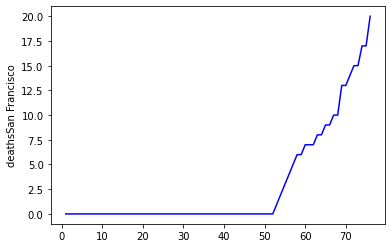

In [56]:
# Make it searchable
df = DataFrame(covids, 
               columns = ['date', 
                          'county', 
                          'state', 
                          'cases', 
                          'deaths'])

df['date'] = pd.to_datetime(df['date'], errors='coerce')


# added states because of ambiguous Jefferson and Wayne
counties = [
    ['Oakland','Michigan'],
    ['Wayne','Michigan'],
    ['Adams','Colorado'],
    ['Boulder','Colorado'],
    ['Denver','Colorado'],
    ['Jefferson','Colorado'],
    ['San Francisco','California']
]
count = 0
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

for county, state in counties:
    plt.clf()
    #Select by state.
    df1= df.loc[df['state'] == state ]
    # this grabs only the ones that have the county field set to the 
    # value of county variable
    select_county= df1.loc[df1['county'] == county ]
    print (len(select_county))
    
    #select_county['new_col'] = range(1, len(select_county) + 1)
    #xdata = select_county['new_col']
    
    ydata = select_county['deaths']
    xdata = range(1, len(ydata) + 1)
    # xdata now has 1-length of x 
    
    
    plt.plot(xdata, ydata, 'b-', label='data')
    plt.ylabel('deaths' + county)
    plt.show

    popt, pcov = curve_fit(func, xdata, ydata)

    #    select_county.plot(x='date',
#                       y='deaths',
#                       title=county + " County, " + state)
    
       